# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict
from pprint import pprint
import os
import glob
from tqdm import tqdm
import json
import threading

# File Parser

In [66]:
def parse_file(file_path):
    data = {}
    current_key = None
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith("Values in master"):
                current_key = "Values in master"
                data[current_key] = []
            elif line.startswith("True values"):
                current_key = "True values"
                data[current_key] = []
            elif line.startswith("Differences"):
                current_key = "Differences"
                data[current_key] = []
            elif current_key is not None:
                if line.startswith("[") and line.endswith("]"):
                    data[current_key] = eval(line)
                else:
                    data[current_key].append(line)
    return data

# Reading data from all folders

In [72]:
def process_folder(folder):
    folder_path = os.path.join(logs_folder, folder)
    if os.path.isdir(folder_path) and folder != "backup":
        data[folder] = {}
        log_files = glob.glob(os.path.join(folder_path, "log_*.txt"))
        for log_file in log_files:
            log_filename = os.path.basename(log_file)
            data[folder][log_filename] = parse_file(log_file)
    return data

# Get the current directory (assuming you are in the "analysis" folder)
current_directory = os.getcwd()
# Go one level up
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))

# Go one level down to access the "logs" folder
logs_folder = os.path.join(parent_directory, "log")
data = {}  # Initialize the top-level dictionary
# List of folders to process
folders_to_process = os.listdir(logs_folder)
# Create and start threads for processing folders
threads = []
for folder in folders_to_process:
    thread = threading.Thread(target=process_folder, args=(folder,))
    thread.start()
    threads.append(thread)

# Wait for all threads to complete
for thread in threads:
    thread.join()

# Writing all data to a text file

In [73]:
# Writing the data dictionary to a file
with open('allData.txt', 'w') as file:
    json.dump(data, file)

# Reading data back from text file

In [3]:
# Reading the data dictionary from the file
with open('allData.txt', 'r') as file:
    data = json.load(file)



In [81]:
print(data['1'])
print(data.keys())
print(data['1'].keys())
print(np.mean(data['1']['log_10.txt']['Differences']))

{'log_10.txt': {'Values in master': ['4', '8', '9', '3', '6', '2', '5', '7', '1', '0'], 'True values': [('9', 10), ('8', 9), ('7', 8), ('6', 7), ('5', 6), ('4', 5), ('3', 4), ('2', 3), ('1', 2), ('0', 1)], 'Differences': [5, 0, 2, 3, 1, 2, 2, 5, 0, 0]}, 'log_100.txt': {'Values in master': ['98', '99', '96', '97', '92', '95', '94', '87', '91', '85', '81', '79', '89', '90', '74', '77', '93', '88', '71', '64', '86', '84', '70', '75', '80', '76', '72', '83', '56', '82', '73', '54', '67', '48', '78', '57', '65', '68', '44', '61', '69', '58', '52', '63', '60', '66', '62', '59', '51', '46', '49', '35', '53', '55', '43', '45', '42', '41', '33', '38', '39', '40', '36', '47', '50', '32', '30', '34', '37', '29', '28', '22', '31', '25', '27', '23', '26', '17', '18', '20', '14', '21', '24', '10', '19', '11', '9', '15', '16', '12', '13', '6', '7', '8', '4', '5', '1', '3', '2', '0'], 'True values': [('99', 100), ('98', 99), ('97', 98), ('96', 97), ('95', 96), ('94', 95), ('93', 94), ('92', 93), ('91'

# Increment of put requests vs mean difference

In [4]:
def getData(data,numOfKeys):
    ret = {}
    numOfKeys = "log_" + str(numOfKeys) + ".txt"
    for incrementPutRequest in data.keys():   
        mean = np.mean(data[incrementPutRequest][numOfKeys]['Differences'])
        ret[incrementPutRequest] = mean
    return ret

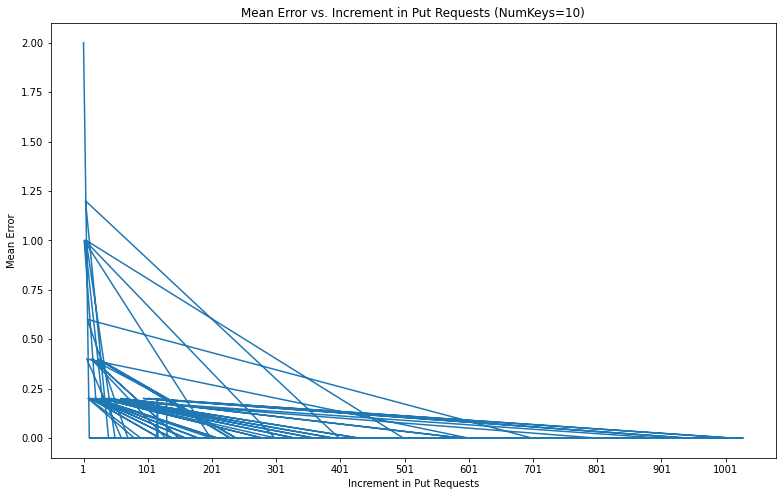

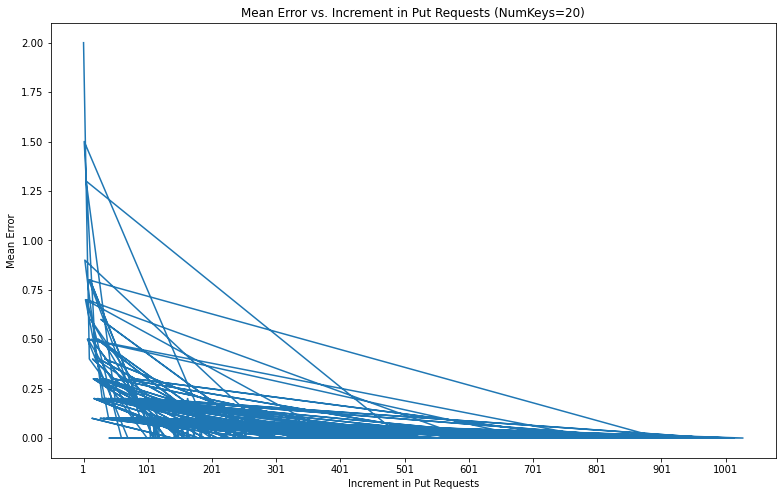

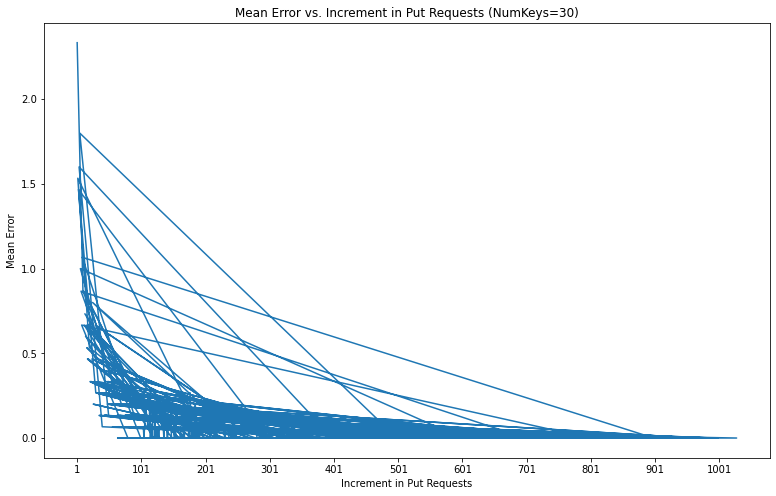

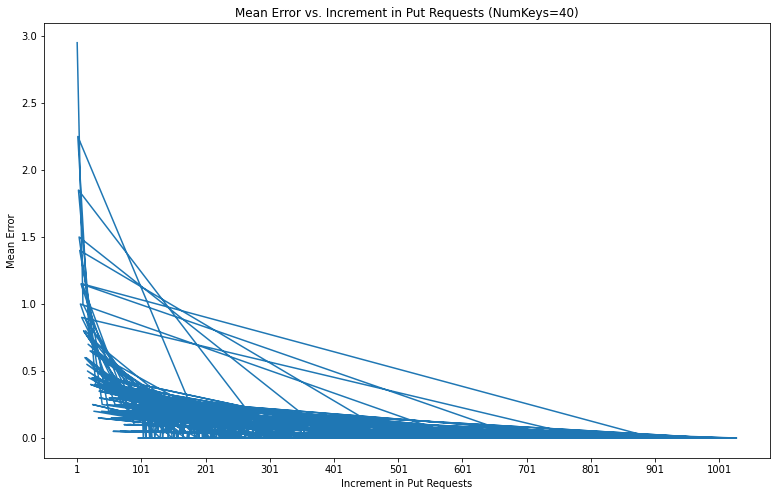

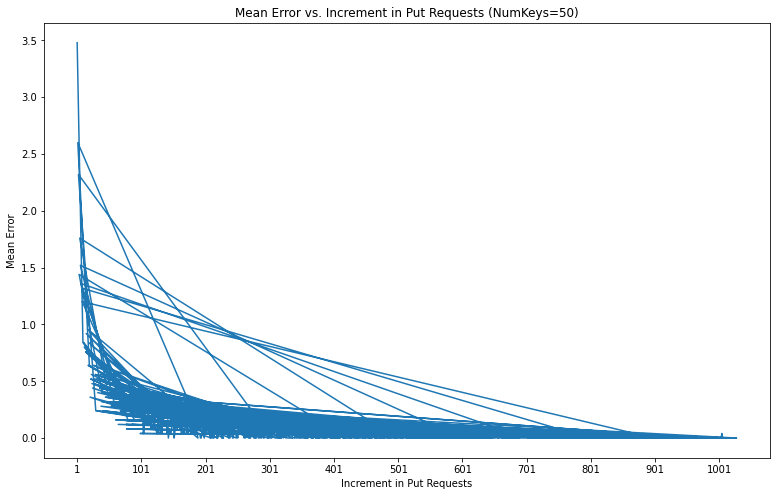

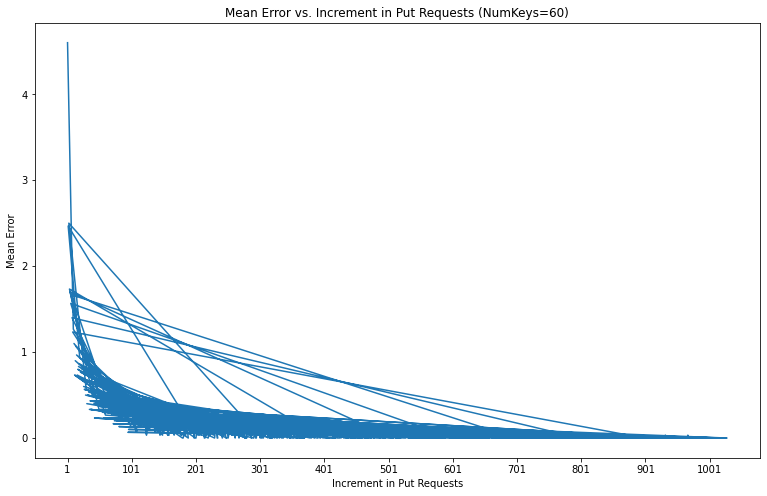

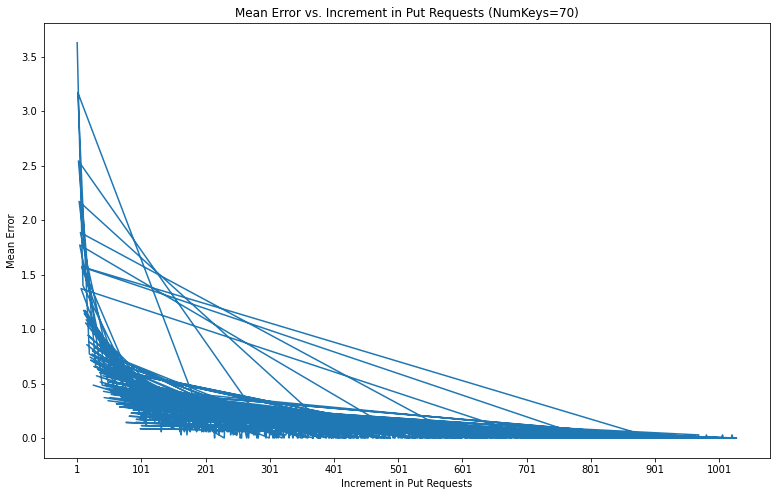

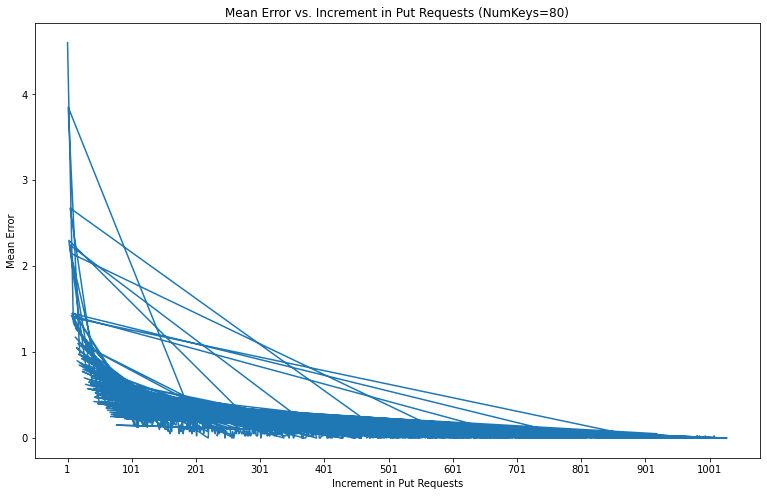

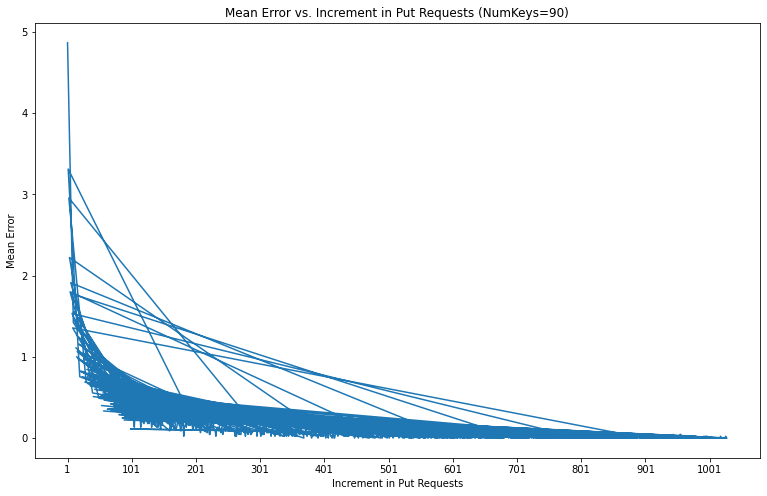

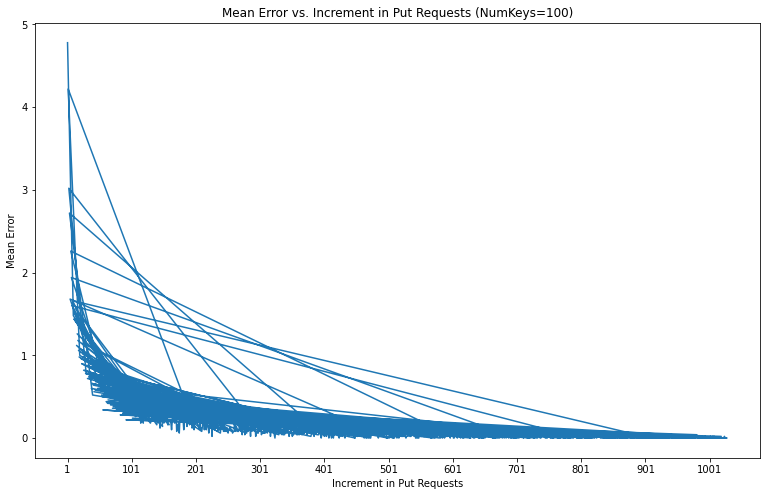

In [8]:
import matplotlib.pyplot as plt
import numpy as np

diffNumOfKeys = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100']

# Assuming getData() generates data for a given number of keys
for numKeys in diffNumOfKeys:
    dataTemp = getData(data, numKeys)  # Replace with your actual function
    X = [float(value) for value in dataTemp.keys()]  # Convert to integers
    Y = list(dataTemp.values())  # Mean Error

    # Create a new figure for each plot
    plt.figure(figsize=(13, 8))

    # Plot the data
    plt.plot(X, Y)
    plt.xlabel("Increment in Put Requests")
    plt.ylabel("Mean Error")
    plt.title(f"Mean Error vs. Increment in Put Requests (NumKeys={numKeys})")

    # Set x-axis ticks from the lowest to the maximum with an increment of 100
    min_x = min(X)
    max_x = max(X)
    x_ticks = list(range(int(min_x), int(max_x) + 1, 100))
    plt.xticks(x_ticks)

    # Display the plot
    plt.show()


# Create and display 10 plots


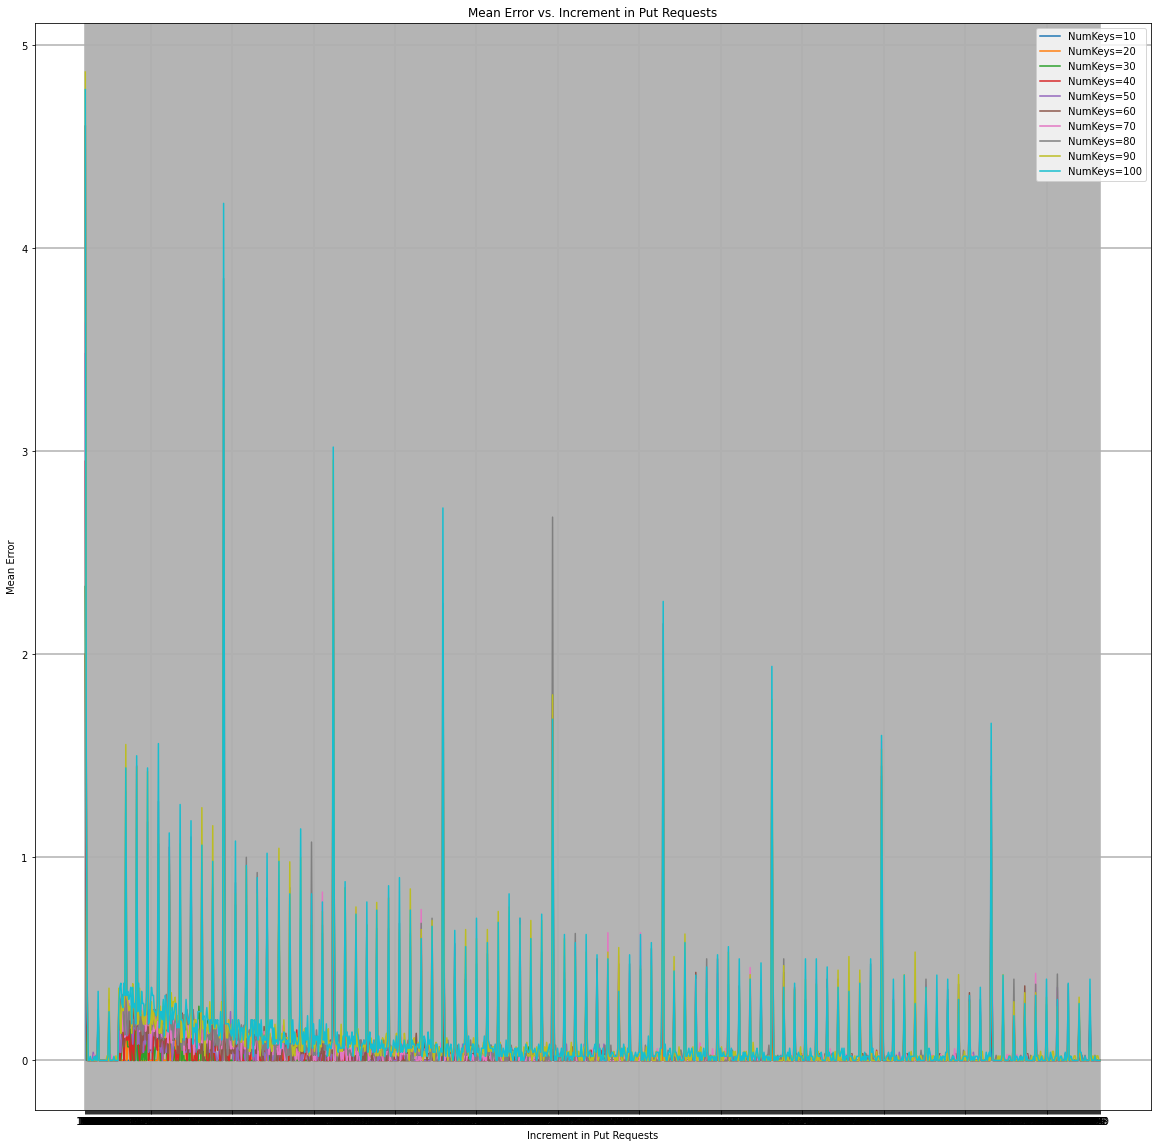

In [108]:
plt.figure(figsize=(20, 20))  # You can adjust the width and height as needed

# Create and display 10 plots
for plot_data in plots:
    plt.plot(plot_data["X"], plot_data["Y"], label=plot_data["label"])

plt.xlabel("Increment in Put Requests")
plt.ylabel("Mean Error")
plt.title("Mean Error vs. Increment in Put Requests")
plt.legend()

# Increase the grid line thickness (make the grid lines a bit bigger)
plt.grid(linewidth=1.5)

plt.show()

## Listing Directories

## Using absolute rank as an indicator

We are using the absolute difference in rank to calculate how far away the value is from it's ideal rank. 

In [ ]:
def calculate_difference(master : List, true_order : List):
    return [np.abs(master[i] - true_order[i]) for i in range(len(master))]

In [ ]:
diff = calculate_difference(master, true_order)

In [ ]:
pprint(diff)

In [ ]:
def write_diff(diff : List):
    length : int = len(diff)
    with open(f"./differences/{length}.txt", "w") as f:
        for i in range(length):
            f.write(f"{diff[i]}\n")

In [ ]:
write_diff(diff)

### Running for all files

In [ ]:
for file in tqdm(dirs):
    master, true_order = convert_file_info(file)
    diff = calculate_difference(master, true_order)
    write_diff(diff)

## Calculating Mean difference in rank

In [ ]:
DIFF_DIR_PATTERN = "./differences/*.txt"
diff_files : List = glob(DIFF_DIR_PATTERN)

In [ ]:
print(diff_files[0])

In [ ]:
# calculate mean of each file
means : dict = {}
for file in diff_files:
    with open(file, "r") as f:
        spl = file.split("/")[-1]
        spl = spl.split(".")
        spl = int(spl[0])
        lines = f.readlines()
        mean = np.mean([int(line) for line in lines])
        means[spl] = mean

In [ ]:
df_means = pd.DataFrame(means.items(), columns=["file", "mean"])

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_means, x="file", y="mean")
plt.xlabel("Number of keys")
plt.ylabel("Mean of differences")
plt.title("Mean of differences between true order and master")
plt.xticks(rotation=90)
plt.savefig("images/mean_of_differences.pdf", dpi=300)
plt.show()


## Graph of means as a fraction of the number of keys

In [ ]:
df_means["fraction"] = df_means["mean"] / df_means["file"]

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_means, x="file", y="fraction")
plt.xlabel("Number of keys")
plt.ylabel("Mean of differences as a fraction of the total number of keys")
plt.title("Mean of differences between true order and master")
plt.xticks(rotation=90)
plt.savefig("images/mean_of_differences_fraction.pdf", dpi=300)
plt.show()